# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 2: Pre-Processing, Initial Modelling

Author: Patrick Smith

Date: 24/03/2024

Contact: patrick.b.smith@gmail.com

         *                 *                  *              *
                                                      *             *
                        *            *                             ___
  *               *                                          |     | |
        *              _________##                 *        / \    | |
                      @\\\\\\\\\##    *     |              |--o|===|-|
  *                  @@@\\\\\\\\##\       \|/|/            |---|   |p|
                    @@ @@\\\\\\\\\\\    \|\\|//|/     *   /     \  |b|
             *     @@@@@@@\\\\\\\\\\\    \|\|/|/         |  U    | |s|
                  @@@@@@@@@----------|    \\|//          |  K    |=| |                                                                                                                       

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Region                         | World region of the country of nationality for the individual.              | object   |
| Return type group              | Grouped type of return (enforced, voluntary, refused entry at port).         | object   |
| Return type                    | Specific type of return (enforced, voluntary, refused entry).               | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Number of returns              | Count of returns.                                                           | float64  |
| Visa type group                | Grouped type of sponsored work visa applied for.                            | object   |
| Visa type subgroup             | Detailed type of sponsored work visa applied for.                           | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Case type                      | Type of case (asylum, resettlement).                                       | object   |
| Case outcome group             | Grouped outcome of the case (granted protection, grant of other leave, refused, withdrawn). | object   |
| UASC                           | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child.       | object   |
| Host Country                   | Country where the individual first sought asylum for resettlement cases.    | object   |
| Location of application        | Location where the application was submitted.                               | object   |
| Applications                   | Number of applications made.                                               | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| SOC code                       | Standard Occupational Classification code.                                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Category of leave group        | Grouped category of extension applied for (work, study, family, other).     | object   |
| Category of leave              | Category of extension applied for.                                         | object   |
| Category of leave subgroup     | Detailed category of extension applied for.                                | object   |
| Current category of leave group| Grouped current category of leave (work, study, family, other).            | object   |
| Current category of leave      | Current category of leave.                                                 | object   |
| Previous category of leave group | Grouped previous category of leave (work, study, family, other).         | object   |
| Previous category of leave     | Previous category of leave.                                                | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| Local authority                | The local authority in which a citizenship ceremony took place.            | object   |
| UK Region                      | The UK region in which the citizenship ceremony took place.                | object   |

## Table of Contents - Book 2

[Data Loading, Objectives, and Initial Clean ](#Load) 

[Initial Preprocessing and Cleaning](#Initial_Preprocessing) 

[Case Outcome](#Case_Outcome) 

[Age](#Age) 

[Preprocessing: Tokenizing and Vectorizing ](#Token)

[Modelling](#Modelling)

[Modelling: LogisticRegression ](#LogisticRegression)

[Modelling: Pipeline](#Pipeline)

[Modelling: Evaluation](#Evaluation)


## Data Loading

<div id='Load'></div>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings

## Next Objective



1) Pre-Processing
2) Focus on dependent variable, case outcome
3) Other columns of importance; Age, Sex, 
4)  variables by imputation
5)   improves the dataset's quality by reducing the number of 'unknown' entries
6) Modelling
7) 
8) Split the data into train and test sets
9) transform the positive and negative review columns using a CountVectorizer
10) Do an EDA (exploratory data analysis)
11) Plots and univariate and bivariate distribution
12) Insights and conclusions to shareholders

After, we will move on to data preprocessing and modelling on the other notebook.

Displaying max columns

In [2]:
pd.options.display.max_columns = None

In [4]:
# Reading the CSV file and setting as df (dataframe)
df_combined = pd.read_csv(r'C:\Users\patri\Downloads\df_combined_EDA1.csv')

In [6]:
df_combined.sample(10)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
64843,2006,1,Sri Lanka,Asia South,voluntary return,controlled returns,18 to 29,1,home country,3,...,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Asia
765538,2021,2,Czechia,EU 8,unknown,Unknown,Unknown,3,Unknown,0,...,Unknown,1.0,0.0,3534 - finance and investment analysts and adv...,financial and insurance activities,associate professional and technical occupations,business and public service associate professi...,"business, finance and related associate profes...",finance and investment analysts and advisers,Europe
802273,2021,4,Portugal,EU 14,unknown,Unknown,Unknown,3,Unknown,0,...,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Europe
191688,2009,1,Zimbabwe,Africa Sub-Saharan,unknown,Unknown,Unknown,3,Unknown,0,...,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Africa
354552,2012,2,Namibia,Africa Sub-Saharan,unknown,Unknown,18 to 29,2,Unknown,0,...,Unknown,0.0,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Africa
257875,2010,2,"Gambia, The",Africa Sub-Saharan,unknown,Unknown,18 to 29,1,Unknown,0,...,Unknown,0.0,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Africa
436000,2014,1,Albania,Europe Other,unknown,Unknown,Under 18,2,Unknown,0,...,Unknown,0.0,5.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Europe
1669,2001,3,Algeria,Africa North,unknown,Unknown,Unknown,3,Unknown,0,...,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Africa
632517,2018,2,India,Asia South,unknown,Unknown,Under 18,2,Unknown,0,...,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Asia
289473,2011,1,Mauritius,Africa Sub-Saharan,unknown,Unknown,Unknown,3,Unknown,0,...,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Africa


In [5]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                        0.0
Quarter                     0.0
Nationality                 0.0
Region                      0.0
Return type group           0.0
Return type                 0.0
Age                         0.0
Sex                         0.0
Return destination group    0.0
Number of returns           0.0
Visa type group             0.0
Applicant type              0.0
Case outcome                0.0
Decisions                   0.0
Case type                   0.0
Case outcome group          0.0
UASC                        0.0
Application type group      0.0
Application type            0.0
Grants                      0.0
Applications                0.0
Occupation                  0.0
Industry                    0.0
Occ. major group            0.0
Occ. sub-major group        0.0
Occ. minor group            0.0
Occ. unit group             0.0
General_Region              0.0
dtype: float64

In [6]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023401 entries, 0 to 1023400
Data columns (total 28 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1023401 non-null  int64  
 1   Quarter                   1023401 non-null  int64  
 2   Nationality               1023401 non-null  object 
 3   Region                    1023401 non-null  object 
 4   Return type group         1023401 non-null  object 
 5   Return type               1023401 non-null  object 
 6   Age                       1023401 non-null  object 
 7   Sex                       1023401 non-null  int64  
 8   Return destination group  1023401 non-null  object 
 9   Number of returns         1023401 non-null  int64  
 10  Visa type group           1023401 non-null  object 
 11  Applicant type            1023401 non-null  object 
 12  Case outcome              1023401 non-null  object 
 13  Decisions                 1

In [7]:
df_combined.duplicated().sum()

5585

In [9]:
clean_df = df_combined.drop_duplicates()

In [30]:
print(f"We have {clean_df.shape[0]} rows and {clean_df.shape[1]} columns with string, floats and integers in our clean data.")

We have 1017816 rows and 28 columns with string, floats and integers in our clean data.


In [31]:
clean_df.nunique()

Year                          23
Quarter                        4
Nationality                  239
Region                        16
Return type group              4
Return type                   10
Age                            6
Sex                            3
Return destination group       4
Number of returns            327
Visa type group                7
Applicant type                 6
Case outcome                   6
Decisions                   4844
Case type                      3
Case outcome group             5
UASC                           2
Application type group         3
Application type               5
Grants                      1040
Applications                 756
Occupation                   325
Industry                      23
Occ. major group              12
Occ. sub-major group          29
Occ. minor group              98
Occ. unit group              321
General_Region                 7
dtype: int64

In [ ]:
df_combined.head()

In [32]:
# Add 'Grants', 'Applications', and 'Decisions' columns together
clean_df['Total'] = clean_df['Grants'] + df_combined['Applications'] + df_combined['Decisions']


C:\Users\patri\AppData\Local\Temp\ipykernel_14624\4287161795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Total'] = clean_df['Grants'] + df_combined['Applications'] + df_combined['Decisions']


In [33]:
clean_df.head()

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Applicant type,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type group,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region,Total
0,2001,1,Afghanistan,Asia Central,unknown,Unknown,Unknown,3,Unknown,0,Unknown,Main Applicant,Case Unknown,2652.0,asylum case,Grant of Other Leave,Unknown,Unknown,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Asia,2652.0
1,2001,1,Afghanistan,Asia Central,unknown,Unknown,Unknown,3,Unknown,0,Unknown,Main Applicant,Refugee Permission,809.0,asylum case,Grant of Protection,Unknown,Unknown,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Asia,809.0
2,2001,1,Afghanistan,Asia Central,unknown,Unknown,Unknown,3,Unknown,0,Unknown,Main Applicant,Refused,15.0,asylum case,Refused,Unknown,Unknown,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Asia,15.0
3,2001,1,Afghanistan,Asia Central,unknown,Unknown,Unknown,3,Unknown,0,Unknown,Main Applicant,Refused,88.0,asylum case,Refused,Unknown,Unknown,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Asia,88.0
4,2001,1,Afghanistan,Asia Central,unknown,Unknown,Unknown,3,Unknown,0,Unknown,Main Applicant,Refused,609.0,asylum case,Refused,Unknown,Unknown,Unknown,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Asia,609.0


### Preprocessing: Case Outcome 

<div id='Case_Outcome'></div>

Checkout the shape of how many cells don't match from 'Case outcome group' and 'Case outcome'. The objective is to remove the group because it seems redundant.

In [35]:
clean_df[clean_df["Case outcome group"] != clean_df['Case outcome']].shape


(981333, 29)

In [37]:
clean_df['Case outcome'].value_counts()

Case outcome
Case Unknown          647090
Issued                177645
Refused               109134
Withdrawn              58910
Refugee Permission     21773
Resettlements           3264
Name: count, dtype: int64

Now we replace "Case Unknown" with "Unknown" in the 'Case outcome' column

In [39]:
clean_df.loc['Case outcome'] = clean_df['Case outcome'].replace('Case Unknown', 'Unknown')

clean_df['Case outcome'].value_counts()

C:\Users\patri\AppData\Local\Temp\ipykernel_14624\3430179230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Case outcome'] = clean_df['Case outcome'].replace('Case Unknown', 'Unknown')


Case outcome
Unknown               647090
Issued                177645
Refused               109134
Withdrawn              58910
Refugee Permission     21773
Resettlements           3264
Name: count, dtype: int64

checking rows where the values in the "Case outcome group" column do not match the values in the "Case outcome" column

In [41]:
clean_df[clean_df["Case outcome group"] != clean_df['Case outcome']].shape


(377365, 29)

In [ ]:
Checking with the column looks like

In [43]:
clean_df['Case outcome group'].value_counts()

Case outcome group
Unknown                 603968
Issued                  174922
Refused                 142453
Withdrawn                59637
Grant of Protection      27957
Grant of Other Leave      8879
Name: count, dtype: int64

There is a lot of unknowns still. We need to reduce that through imputations

To locate rows where "Case outcome group" is "unknown", and "Case outcome" is not "unknown".

We are trying to make sure they match as much as possible so we can delete group.

This code updates the values in "Case outcome group" to match the value in "Case outcome"

In [42]:
clean_df.loc[(clean_df["Case outcome group"].str.lower() == 'unknown') & 
               (clean_df["Case outcome"].str.lower() != 'unknown'), 
               "Case outcome group"] = clean_df.loc[(clean_df["Case outcome group"].str.lower() == 'unknown') & 
                                                      (clean_df["Case outcome"].str.lower() != 'unknown'), 
                                                      "Case outcome"]


print(clean_df[clean_df["Case outcome group"] != clean_df['Case outcome']].shape)


(70882, 29)


-  List named known_outcomes is created
-  Iterate over each outcome:
-  Find matches for each outcome (for specific known values (like 'Issued', 'Refused', etc.)
-  To find rows where both the 'Case outcome' and 'Case outcome group' columns match the current outcome
-  The length (number) of the matches dataframe, determined using len
-  "Case outcome" and "Case outcome group" columns in clean_df to check if they match 

In [45]:
known_outcomes = ['Issued', 'Refused', 'Withdrawn', 'Refugee Permission', 'Resettlements']

for outcome in known_outcomes:
    matches = clean_df[(clean_df['Case outcome'].str.lower() == outcome.lower()) & 
                       (clean_df['Case outcome group'].str.lower() == outcome.lower())]
    print(f"Matches for {outcome}: {len(matches)}")


Matches for Issued: 174922
Matches for Refused: 109134
Matches for Withdrawn: 58910
Matches for Refugee Permission: 0
Matches for Resettlements: 0


- Iterate over a list of specific case outcomes 
- Calculate the number of rows where the values in both the 'Case outcome' and 'Case outcome group' columns
- To match to the outcomes in the list

In [46]:
# Convert both columns to lowercase for case-insensitive comparison
clean_df['Case outcome lower'] = clean_df['Case outcome'].str.lower()
clean_df['Case outcome group lower'] = clean_df['Case outcome group'].str.lower()

# Check matches and mismatches
matches = clean_df[clean_df['Case outcome lower'] == clean_df['Case outcome group lower']]
mismatches = clean_df[clean_df['Case outcome lower'] != clean_df['Case outcome group lower']]

print(f"Total matches: {len(matches)}")
print(f"Total mismatches: {len(mismatches)}")


C:\Users\patri\AppData\Local\Temp\ipykernel_14624\2375515491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Case outcome lower'] = clean_df['Case outcome'].str.lower()
C:\Users\patri\AppData\Local\Temp\ipykernel_14624\2375515491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Case outcome group lower'] = clean_df['Case outcome group'].str.lower()


Total matches: 946934
Total mismatches: 70882


Review some mismatched rows to understand the discrepancy

In [48]:
print(mismatches[['Case outcome', 'Case outcome group']].sample(25))


              Case outcome    Case outcome group
479711             Unknown               Refused
32146              Unknown               Refused
621831             Unknown  Grant of Other Leave
410942       Resettlements   Grant of Protection
267969              Issued   Grant of Protection
150559  Refugee Permission   Grant of Protection
456568  Refugee Permission   Grant of Protection
160574             Unknown             Withdrawn
996796  Refugee Permission   Grant of Protection
585754  Refugee Permission   Grant of Protection
632830             Unknown  Grant of Other Leave
316164             Unknown               Refused
480383  Refugee Permission   Grant of Protection
827435             Unknown               Refused
762647             Unknown               Refused
691656  Refugee Permission   Grant of Protection
480617             Unknown               Refused
40816              Unknown               Refused
714144              Issued   Grant of Protection
218478  Refugee Perm

- Locate rows where "Case outcome" is 'Unknown'
- but the "Case outcome group" is populated with a specific outcome (not 'Unknown')
- For these rows, the value in "Case outcome" is replaced with the corresponding value from "Case outcome group". 
- Update "Case outcome" to match "Case outcome group".

- 


In [49]:
clean_df.loc[
    (clean_df["Case outcome"].str.lower() == 'unknown') & 
    (clean_df["Case outcome group"].str.lower() != 'unknown'),
    "Case outcome"
] = clean_df.loc[
    (clean_df["Case outcome"].str.lower() == 'unknown') & 
    (clean_df["Case outcome group"].str.lower() != 'unknown'),
    "Case outcome group"
]


In [50]:
# It's recommended to verify the operation by checking the count of 'Unknown' in "Case outcome" again
print(clean_df["Case outcome"].value_counts())

# Additionally, you might want to reassess the matches and mismatches after the update
matches_after1 = clean_df[clean_df['Case outcome'].str.lower() == clean_df['Case outcome group'].str.lower()]
mismatches_after1 = clean_df[clean_df['Case outcome'].str.lower() != clean_df['Case outcome group'].str.lower()]

print(f"After update, total matches: {len(matches_after1)}")
print(f"After update, total mismatches: {len(mismatches_after1)}")


Case outcome
Unknown                 603968
Issued                  177645
Refused                 142453
Withdrawn                59637
Refugee Permission       21773
Grant of Other Leave      8866
Resettlements             3264
Grant of Protection        210
Name: count, dtype: int64
After update, total matches: 990056
After update, total mismatches: 27760


if case == issued and case outcome == group then case outcome == refugee permission

In [90]:
# Review some mismatched rows to understand the discrepancy
print(mismatches_after1[['Case outcome', 'Case outcome group']].sample(10))


              Case outcome   Case outcome group
129706  Refugee Permission  Grant of Protection
468981  Refugee Permission  Grant of Protection
31978   Refugee Permission  Grant of Protection
937146  Refugee Permission  Grant of Protection
851768  Refugee Permission  Grant of Protection
596958  Refugee Permission  Grant of Protection
762758  Refugee Permission  Grant of Protection
410077  Refugee Permission  Grant of Protection
573858  Refugee Permission  Grant of Protection
782143       Resettlements  Grant of Protection


Only grant of protection seems to be - so we can drop this 

In [91]:
clean_df = clean_df.drop(columns=['Case outcome group'])

In [ ]:
# note this is going to be key encoding
#so first make a data frame with all necesary data and get rid of as many unknowns as possible


In [94]:
clean_df['Case type'].value_counts()

Case type
Unknown              910451
asylum case          103904
resettlement case      3461
Name: count, dtype: int64

LAST

In [95]:
# Perform the update first
clean_df.loc[
    (clean_df["Case outcome"].str.lower() == 'unknown') & 
    (clean_df["Case type"].str.lower() != 'unknown'),
    "Case outcome"
] = clean_df.loc[
    (clean_df["Case outcome"].str.lower() == 'unknown') & 
    (clean_df["Case type"].str.lower() != 'unknown'),
    "Case type"
]

# Recalculate the "Case outcome" and "Case type" alignment for specified types
specified_types = ['asylum case', 'resettlement case']

for case_type in specified_types:
    # Matches where "Case outcome" now aligns with "Case type"
    matches = clean_df[(clean_df['Case outcome'].str.lower() == case_type) & 
                       (clean_df['Case type'].str.lower() == case_type)]
    
    # Mismatches where "Case outcome" does not align with "Case type"
    mismatches = clean_df[(clean_df['Case outcome'].str.lower() != case_type) & 
                          (clean_df['Case type'].str.lower() == case_type)]
    
    print(f"Matches for {case_type}: {len(matches)}")
    print(f"Mismatches for {case_type}: {len(mismatches)}")


Unique values in 'Case Outcome':
 ['Grant of Other Leave' 'Refugee Permission' 'Refused' 'Withdrawn'
 'Unknown' 'Issued' 'Resettlements' 'Grant of Protection']

Unique values in 'Case Type':
 ['asylum case' 'Unknown' 'resettlement case']


## Age

<div id='Age'></div>

In [ ]:
do age to student visas

In [ ]:
clean_df['Age'].value_counts()

In [14]:

clean_df['Visa type group'].value_counts()


Visa type group
Unknown                         711333
work                             93704
study                            59550
other                            59218
family                           44233
visitor                          32570
dep. joining or accompanying     17208
Name: count, dtype: int64

Age
Unknown     449985
18 to 29    217080
30 to 49    173742
Under 18     87094
50 to 69     72644
70+          17271
Name: count, dtype: int64

In [10]:
# Filter for rows where 'Visa type group' is 'study' and 'Age' is not 'Unknown'
filtered_rows = clean_df[(clean_df['Visa type group'] == 'study') & (clean_df['Visa type group'] != 'Unknown')]

# Select and display the 'Visa type group' and 'Age' columns from these filtered rows
selected_columns = filtered_rows[['Visa type group', 'Age']]

# Display the result
print(selected_columns)


       Visa type group      Age
27917            study  Unknown
27918            study  Unknown
27919            study  Unknown
27920            study  Unknown
27938            study  Unknown
...                ...      ...
994557           study  Unknown
994558           study  Unknown
994559           study  Unknown
994560           study  Unknown
994561           study  Unknown

[59550 rows x 2 columns]


In [11]:
clean_df.loc[(clean_df['Age'].str.lower() == 'unknown') & (clean_df['Visa type group'] == 'study'), 'Age'] = '18 to 29'

In [13]:
# If you still need to filter and display specific rows afterwards:
# Filter for rows where 'Visa type group' is 'study' and 'Age' is not 'Unknown'
filtered_rows = clean_df[(clean_df['Visa type group'] == 'study') & (clean_df['Age'].str.lower() != 'unknown')]

# Select and display the 'Visa type group' and 'Age' columns from these filtered rows
selected_columns = filtered_rows[['Visa type group', 'Age']]

# Display the result
print(selected_columns)

       Visa type group       Age
27917            study  18 to 29
27918            study  18 to 29
27919            study  18 to 29
27920            study  18 to 29
27938            study  18 to 29
...                ...       ...
994557           study  18 to 29
994558           study  18 to 29
994559           study  18 to 29
994560           study  18 to 29
994561           study  18 to 29

[59550 rows x 2 columns]


In [3]:
clean_df.head()

NameError: name 'clean_df' is not defined

In [18]:
#Unaccompanied Asylum Seeking Children (UASC) if uasc - age = children

clean_df['UASC'].value_counts()

UASC
Unknown    1004864
uasc         12952
Name: count, dtype: int64

In [25]:
# Corrected example of filtering rows based on conditions for "UASC" and "Age"
filtered_rows2 = clean_df.loc[(clean_df["UASC"].str.lower() != 'unknown') & (clean_df['Age'].str.lower() != 'unknown')]

# Display the filtered DataFrame
print(filtered_rows2)


        Year  Quarter  Nationality              Region Return type group  \
191736  2009        1  Afghanistan        Asia Central           unknown   
191737  2009        1  Afghanistan        Asia Central           unknown   
191739  2009        1  Afghanistan        Asia Central           unknown   
191741  2009        1  Afghanistan        Asia Central           unknown   
191745  2009        1  Afghanistan        Asia Central           unknown   
...      ...      ...          ...                 ...               ...   
998791  2023        3       Turkey        Europe Other           unknown   
998805  2023        3       Uganda  Africa Sub-Saharan           unknown   
998866  2023        3      Vietnam     Asia South East           unknown   
998869  2023        3      Vietnam     Asia South East           unknown   
998888  2023        3        Yemen         Middle East           unknown   

       Return type       Age  Sex Return destination group  Number of returns  \
191736

In [26]:
clean_df.loc[(clean_df['Age'].str.lower() == 'unknown') & (clean_df['UASC'] == 'uasc'), 'Age'] = 'Under 18'

In [27]:
clean_df['Age'].value_counts()


Age
Unknown     449985
18 to 29    217080
30 to 49    173742
Under 18     87094
50 to 69     72644
70+          17271
Name: count, dtype: int64

In [ ]:
# Define the list of known groups
known_groups = ['Refused', 'Grant of Protection', 'Withdrawn', 'Grant of Other Leave']

# Use `.where()` to keep the value if it's in known_groups, else replace with 'Unknown'
df_combined['Case outcome group'] = df_combined['Case outcome group'].where(df_combined['Case outcome group'].isin(known_groups), other='Unknown')


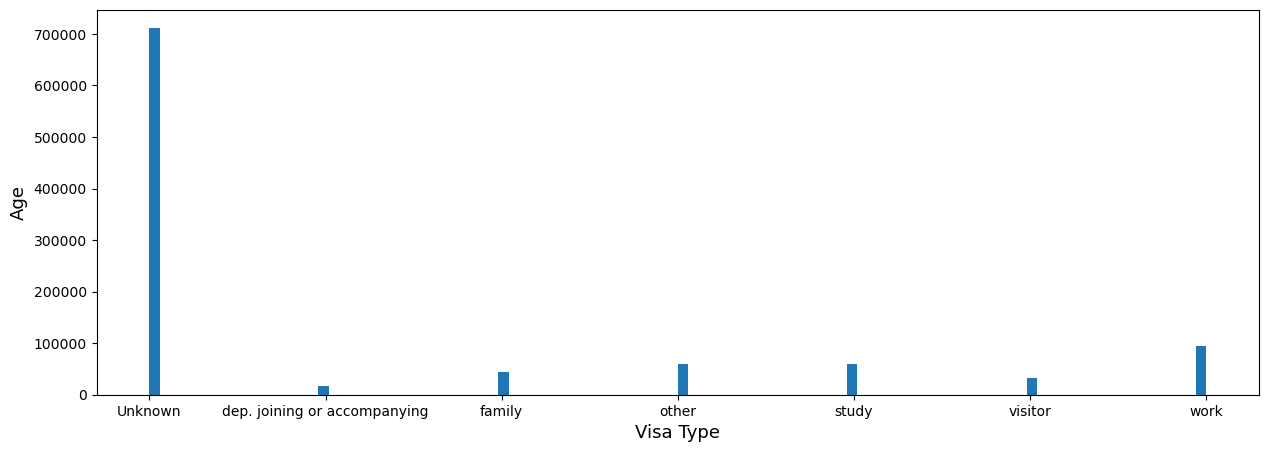

In [81]:
plt.figure(figsize=(15,5))
plt.hist(clean_df['Visa type group'], bins = 100)
plt.ylabel("Age", size=13)
plt.xlabel("Visa Type", size=13)
plt.show()



1) Select only numeric columns for scaling
2) Initialize the StandardScaler
3) Create a new DataFrame from the scaled data with the original numeric column names

In [43]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming clean_df is already defined
numeric_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize and fit StandardScaler on the numeric columns
my_ss = StandardScaler()
X = my_ss.fit_transform(clean_df[numeric_cols])

# Create a DataFrame from the scaled data
clean_df_scaled = pd.DataFrame(data=X, columns=numeric_cols)

# Apply log transformation only to the numeric columns, adding 1 to avoid log(0)
log_transformed = np.log(clean_df[numeric_cols] + 1)



In [2]:
import pandas as pd

# Detention costs data
data = {
    "Year_Quarter": [
        "2013 Q1", "2013 Q2", "2013 Q3", "2013 Q4",
        "2014 Q1", "2014 Q2", "2014 Q3", "2014 Q4",
        "2015 Q1", "2015 Q2", "2015 Q3", "2015 Q4",
        "2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4",
        "2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4",
        "2018 Q1", "2018 Q2", "2018 Q3", "2018 Q4",
        "2019 Q1", "2019 Q2", "2019 Q3", "2019 Q4",
        "2020 Q1", "2020 Q2", "2020 Q3", "2020 Q4",
        "2021 Q1", "2021 Q2", "2021 Q3", "2021 Q4",
        "2022 Q1", "2022 Q2", "2022 Q3", "2022 Q4",
        "2023 Q1", "2023 Q2", "2023 Q3"
    ],
    "Cost": [
        102.00, 100.00, 100.00, 100.00, 98.00, 98.70, 97.10, 96.16,
        92.67, 91.61, 90.41, 90.59, 89.93, 88.46, 87.63, 86.08,
        85.47, 85.53, 85.92, 85.97, 86.92, 87.52, 88.29, 87.71,
        88.68, 90.21, 91.34, 95.49, 96.86, 97.54, 99.56, 96.66,
        101.17, 98.78, 101.42, 101.61, 107.23, 113.16, 115.32, 120.42,
        112.85, 107.71, 104.99
    ]
}
detention_costs_df = pd.DataFrame(data)
# Split 'Year_Quarter' into 'Year' and 'Quarter'
detention_costs_df['Year'] = detention_costs_df['Year_Quarter'].str.split().str[0].astype(int)
detention_costs_df['Quarter'] = detention_costs_df['Year_Quarter'].str.split().str[1].replace({'Q1': '1', 'Q2': '2', 'Q3': '3', 'Q4': '4'})

# Merge preparation
clean_df['Quarter'] = clean_df['Quarter'].astype(str)  # Ensure Quarter is string for consistency

# Merging
clean_df_merged = pd.merge(clean_df, detention_costs_df, how='left', on=['Year', 'Quarter'])


#REF: #REF: https://migrationobservatory.ox.ac.uk/resources/briefings/immigration-detention-in-the-uk/

NameError: name 'clean_df' is not defined

In [ ]:
clean_df_merged.head()

In [ ]:
DT_02: Average cost per day to hold an individual in immigration detention1,B
Back to Contents

 	 
Quarter	Cost
2013 Q1	£102.00
2013 Q2	£100.00
2013 Q3	£100.00
2013 Q4	£100.00
2014 Q1	£98.00
2014 Q2	£98.70
2014 Q3	£97.10
2014 Q4	£96.16
2015 Q1	£92.67
2015 Q2	£91.61
2015 Q3	£90.41
2015 Q4	£90.59
2016 Q1	£89.93
2016 Q2	£88.46
2016 Q3	£87.63
2016 Q4	£86.08
2017 Q1	£85.47
2017 Q2	£85.53
2017 Q3	£85.92
2017 Q4	£85.97
2018 Q1	£86.92
2018 Q2	£87.52
2018 Q3	£88.29
2018 Q4	£87.71
2019 Q1	£88.68
2019 Q2	£90.21
2019 Q3	£91.34
2019 Q4	£95.49
2020 Q1	£96.86
2020 Q2	£97.54
2020 Q3	£99.56
2020 Q4	£96.66
2021 Q1	£101.17
2021 Q2	£98.78
2021 Q3	£101.42
2021 Q4	£101.61
2022 Q1	£107.23
2022 Q2	£113.16
2022 Q3	£115.32
2022 Q4	£120.42
2023 Q1	£112.85
2023 Q2	£107.71
2023 Q3	£104.99




UASC
Unknown    1010181
uasc         13220
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np

str_cols = clean_df.select_dtypes(include=['object'])
mask_str = ~(str_cols.apply(lambda x: x.str.lower()).isin(['unknown']).any(axis=1))

num_cols = clean_df.select_dtypes(include=['int64', 'float64'])
mask_num = ~(num_cols.isin([0]).any(axis=1))

# Combine masks to get a mask for rows to keep
mask_combined = mask_str & mask_num

clean_df_no_unknown_or_zero = clean_df.loc[mask_combined]

clean_df_no_unknown_or_zero.info()


In [ ]:
cols_with_unknown = clean_df.apply(lambda x: x.astype(str).str.lower().str.contains('unknown').any(), axis=0)
cols_with_unknown = cols_with_unknown[cols_with_unknown].index.tolist()

cols_with_zero = clean_df.select_dtypes(include=['int64', 'float64']).apply(lambda x: (x==0).any(), axis=0)
cols_with_zero = cols_with_zero[cols_with_zero].index.tolist()

# Combine the lists, ensuring uniqueness
cols_of_interest = list(set(cols_with_unknown + cols_with_zero))

clean_df_c = clean_df[cols_of_interest].copy()

clean_df_c.info()